In [ ]:
#import necessary tools
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)

#Check for GPU availability
print(tf.config.list_physical_devices("GPU"))

2.19.0
[]


In [ ]:
labels_csv = pd.read_csv("dog-breed-identification/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

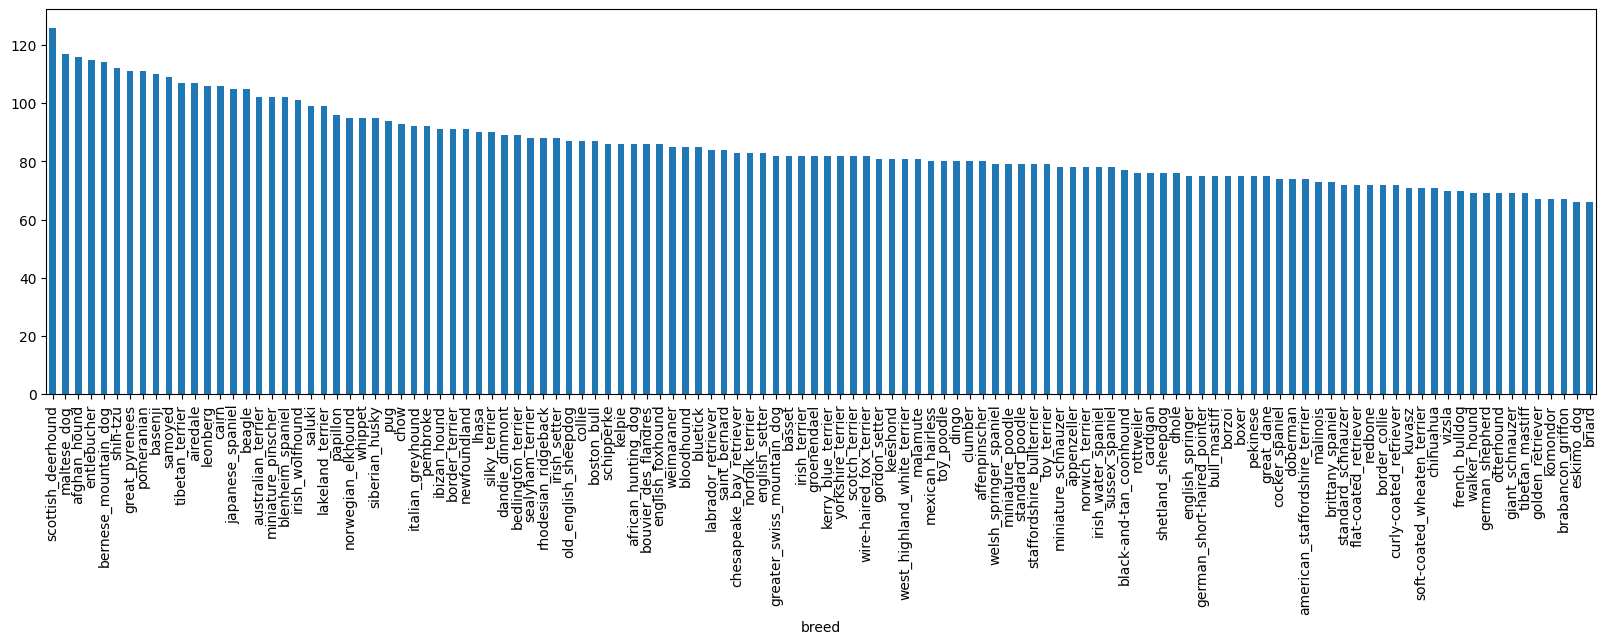

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,5))

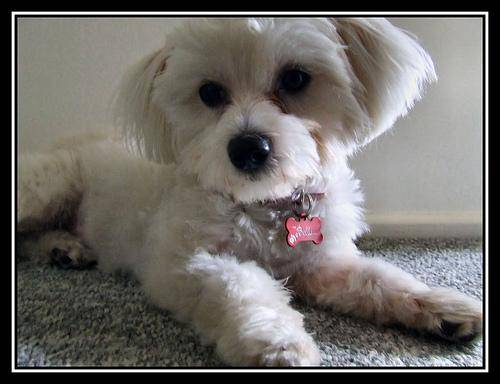

In [ ]:
#Let's view an image
from IPython.display import Image
Image("dog-breed-identification/train/0abdda879bb143b19e3c480279541915.jpg")

In [ ]:
# Create pathnames from image Id
filename = ["dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filename[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#Lets' check whether filenames matches actual amount of files
import os
if len(os.listdir("dog-breed-identification/train")) == len(filename):
  print("Success")
else:
  print("Check again")

Check again


In [ ]:
#prepare labels
labels = labels_csv["breed"].to_numpy()
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filename):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# Turn every labels into a boolean array
boolean_labels = [labels == unique_breeds for labels in labels]
boolean_labels[2]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
len(labels)

10222

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
print(boolean_labels[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Turning boolean array into integers
print(labels[2]) # original label
print(np.where(unique_breeds == labels[2])) # index where label occurs
print(boolean_labels[2].argmax()) # index where label occurs in boolean array
print(boolean_labels[2].astype(int)) # there will be a 1 where the sample label occurs

pekinese
(array([85]),)
85
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
filename[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#Setting our very own validation set because there is no Kaggle included validation set
#Setup X & y variables
X = filename
y = boolean_labels
len(filename)

10222

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000}

In [ ]:
#Let's split the data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
#Define Image size
IMG_SIZE = 224

#Creating a functon to preprocess the images
def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

**Turn Data Into Batches**

In [ ]:
#Create a function to return a tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
 # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

        # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [ ]:
#Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

**Visualizing Data Batches**

In [ ]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range (25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i]])
    plt.axis("off")

In [ ]:
import os

# Get a set of existing image IDs from the training directory
existing_image_ids = set([os.path.splitext(f)[0] for f in os.listdir("dog-breed-identification/train")])

# Create a new DataFrame with only existing image IDs
labels_csv_filtered = labels_csv[labels_csv['id'].isin(existing_image_ids)]

# Create pathnames from image Id for existing files only
filename_filtered = ["dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv_filtered["id"]]

# Prepare labels for existing files only
labels_filtered = labels_csv_filtered["breed"].to_numpy()
unique_breeds_filtered = np.unique(labels_filtered)
boolean_labels_filtered = [label == unique_breeds_filtered for label in labels_filtered]

# Update X and y with filtered data
X = filename_filtered
y = boolean_labels_filtered

# Re-split the data into train and validation with filtered data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

# Re-create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

Creating training data batches...
Creating validation data batches...


(array([[[[7.22495615e-01, 7.65632868e-01, 7.44449377e-01],
          [7.20576108e-01, 7.55870223e-01, 7.38608301e-01],
          [5.93691587e-01, 6.24804139e-01, 6.11535251e-01],
          ...,
          [6.51116729e-01, 6.74204409e-01, 6.74204409e-01],
          [8.26862574e-01, 8.29593599e-01, 8.50987256e-01],
          [6.49012506e-01, 6.45090938e-01, 6.76463485e-01]],
 
         [[9.25086200e-01, 9.57666695e-01, 9.56055999e-01],
          [9.51046288e-01, 9.79302526e-01, 9.78094518e-01],
          [8.85900915e-01, 9.23223197e-01, 9.19639587e-01],
          ...,
          [8.57543588e-01, 8.77554119e-01, 8.88110816e-01],
          [5.16560674e-01, 5.19291699e-01, 5.39617062e-01],
          [8.98636937e-01, 8.94715428e-01, 9.08210814e-01]],
 
         [[8.69080663e-01, 9.16104436e-01, 9.24537480e-01],
          [8.87032986e-01, 9.29082155e-01, 9.44698453e-01],
          [9.49112833e-01, 9.84280109e-01, 9.89176512e-01],
          ...,
          [5.22144258e-01, 5.41752100e-01, 5.5351

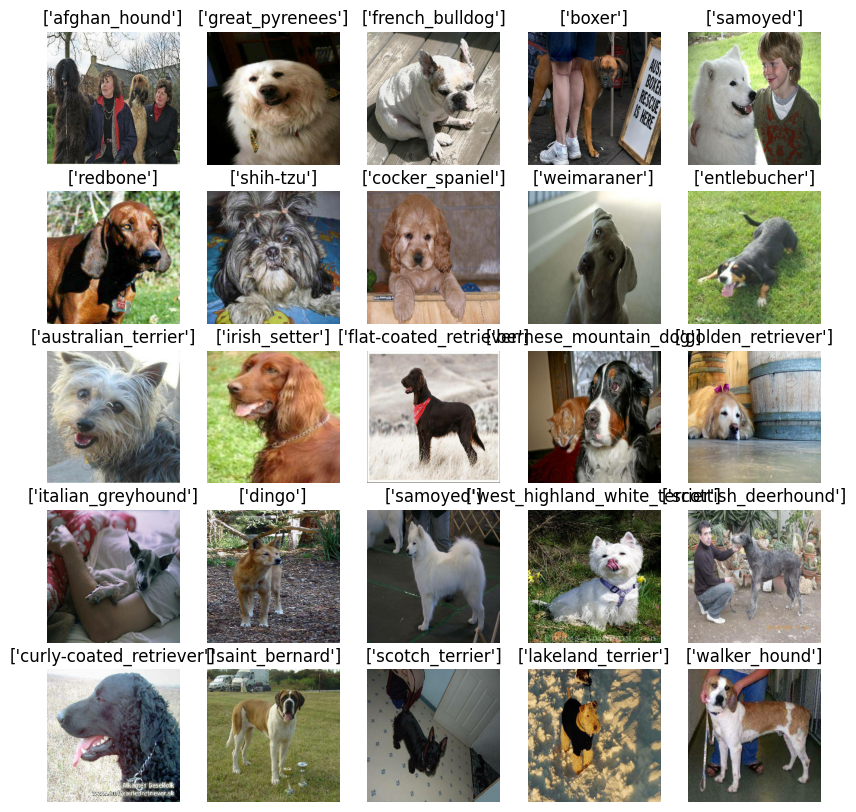

In [ ]:
#Let's visualize the data
show_25_images(train_images, train_labels)

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
val_images, val_labels

(array([[[[0.63529414, 0.5058824 , 0.43137258],
          [0.6287115 , 0.49929976, 0.42478997],
          [0.62457985, 0.5009104 , 0.42352945],
          ...,
          [0.5757003 , 0.4815826 , 0.46589634],
          [0.5855742 , 0.49145654, 0.47577026],
          [0.5921569 , 0.49803925, 0.48235297]],
 
         [[0.63529414, 0.5058824 , 0.43137258],
          [0.6314739 , 0.50206214, 0.4275523 ],
          [0.62546146, 0.501792  , 0.42441103],
          ...,
          [0.5757003 , 0.4815826 , 0.46589634],
          [0.5855742 , 0.49145654, 0.47577026],
          [0.5921569 , 0.49803925, 0.48235297]],
 
         [[0.6439076 , 0.51449585, 0.43998602],
          [0.63820654, 0.5087948 , 0.434285  ],
          [0.62927043, 0.505601  , 0.42822006],
          ...,
          [0.5757003 , 0.4815826 , 0.46589634],
          [0.5855742 , 0.49145654, 0.47577026],
          [0.5921569 , 0.49803925, 0.48235297]],
 
         ...,
 
         [[0.604972  , 0.5924369 , 0.48816508],
          [0.60826

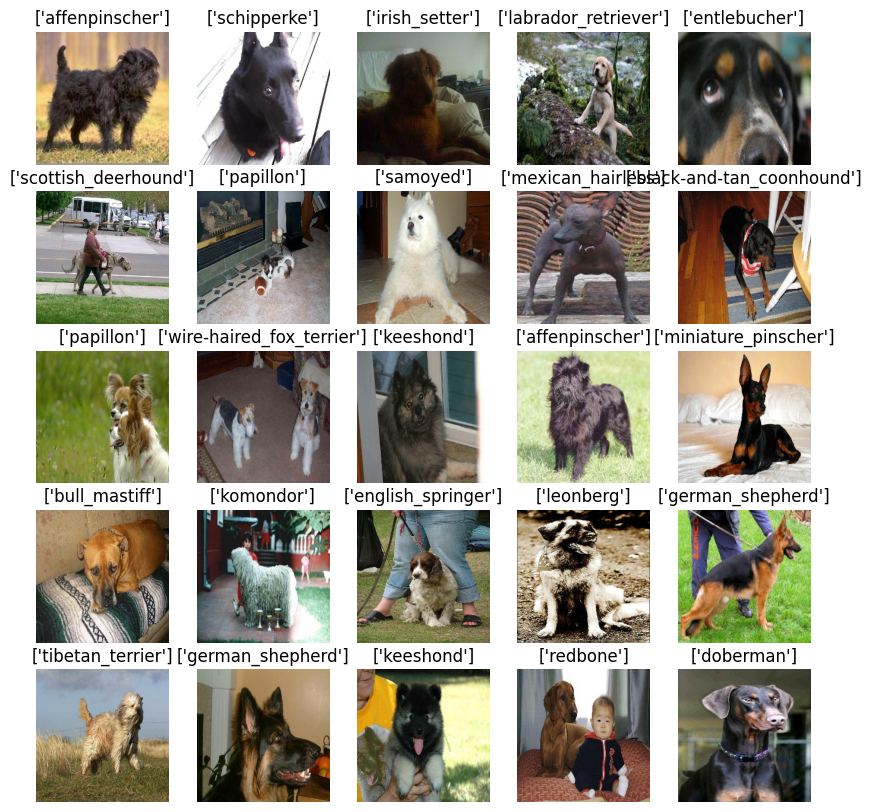

In [ ]:
show_25_images(val_images, val_labels)

**Build The Model**

In [ ]:
import tf_keras as keras                # <-- use tf-keras API
from tensorflow_hub import KerasLayer

INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
OUTPUT_SHAPE = len(unique_breeds_filtered)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"  # use feature_vector model that accepts 224x224 input

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building with:", model_url)
    model = keras.Sequential([
        KerasLayer(model_url, input_shape=input_shape, trainable=False),  # freeze base
        keras.layers.Dense(output_shape, activation="softmax")
    ])
    model.compile(
        loss=keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    return model

model = create_model()
model.summary()

Building with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
Total params: 2411704 (9.20 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


**Create Callbacks** to help with checking and saving progress, as well as early stopping to prevent overfitting.

In [ ]:
import datetime
def create_tensorboard_callback():
  logdir = os.path.join("/content/drive/MyDrive/Dog Breed Identificattion/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#creating early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience=3)

**Train the Model (data subset)**

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  from tf_keras.callbacks import EarlyStopping, TensorBoard

# recreate BOTH callbacks from tf_keras
  early_stopping = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
  tensorboard = TensorBoard(log_dir="/content/drive/MyDrive/Dog Breed Identificattion/logs/run") # Update log_dir

  model.fit(train_data, epochs=NUM_EPOCHS, validation_data=val_data,
          callbacks=[tensorboard, early_stopping])


  # Return the fitted model
  return model

In [ ]:
model = train_model()

Building with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5
Epoch 1/100
25/25 [==============================] - 56s 2s/step - loss: 4.2941 - accuracy: 0.1225 - val_loss: 3.3219 - val_accuracy: 0.2750
Epoch 2/100
25/25 [==============================] - 37s 1s/step - loss: 1.7501 - accuracy: 0.6988 - val_loss: 2.0986 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 34s 1s/step - loss: 0.7410 - accuracy: 0.9325 - val_loss: 1.6303 - val_accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 37s 1s/step - loss: 0.3831 - accuracy: 0.9812 - val_loss: 1.4356 - val_accuracy: 0.6500
Epoch 5/100
25/25 [==============================] - 32s 1s/step - loss: 0.2364 - accuracy: 0.9937 - val_loss: 1.3430 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 37s 2s/step - loss: 0.1674 - accuracy: 0.9987 - val_loss: 1.2909 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================] - 36s 1s/step - 

**Make Evaluations and Predictions Based On Trained Model**

In [ ]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 8s 859ms/step


array([[5.4952478e-01, 5.0696457e-04, 3.0388139e-04, ..., 5.8828387e-04,
        5.8905297e-04, 5.8990102e-03],
       [8.9953380e-04, 4.1716256e-05, 3.3720405e-04, ..., 1.5800218e-03,
        4.4825745e-05, 9.8066535e-05],
       [1.0892539e-03, 7.6873819e-03, 6.4520464e-05, ..., 2.2561688e-03,
        2.0632349e-04, 1.1139795e-03],
       ...,
       [2.4590400e-04, 1.0340521e-03, 2.0808192e-04, ..., 3.8878217e-03,
        1.8487767e-03, 2.1501417e-04],
       [3.2796172e-04, 6.3899533e-05, 5.1863748e-04, ..., 1.5582885e-03,
        1.1839681e-04, 3.8197407e-04],
       [9.3651477e-05, 1.8703699e-04, 4.1531603e-04, ..., 4.0145583e-02,
        3.5861114e-05, 3.3176231e-05]], dtype=float32)

In [ ]:
# Turn prediction probabilities into label

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

'malamute'

In [ ]:
# Create a function to unbatch a dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels"""
  images = []
  labels = []
  for image, label in data.unbatch():
    images.append(image.numpy())
    labels.append(unique_breeds[label.numpy().argmax()])
  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.63529414, 0.5058824 , 0.43137258],
         [0.6287115 , 0.49929976, 0.42478997],
         [0.62457985, 0.5009104 , 0.42352945],
         ...,
         [0.5757003 , 0.4815826 , 0.46589634],
         [0.5855742 , 0.49145654, 0.47577026],
         [0.5921569 , 0.49803925, 0.48235297]],
 
        [[0.63529414, 0.5058824 , 0.43137258],
         [0.6314739 , 0.50206214, 0.4275523 ],
         [0.62546146, 0.501792  , 0.42441103],
         ...,
         [0.5757003 , 0.4815826 , 0.46589634],
         [0.5855742 , 0.49145654, 0.47577026],
         [0.5921569 , 0.49803925, 0.48235297]],
 
        [[0.6439076 , 0.51449585, 0.43998602],
         [0.63820654, 0.5087948 , 0.434285  ],
         [0.62927043, 0.505601  , 0.42822006],
         ...,
         [0.5757003 , 0.4815826 , 0.46589634],
         [0.5855742 , 0.49145654, 0.47577026],
         [0.5921569 , 0.49803925, 0.48235297]],
 
        ...,
 
        [[0.604972  , 0.5924369 , 0.48816508],
         [0.6082633 , 0.5957282 , 0.49145

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction"""
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title(f"Prediction: {pred_label}, {np.max(pred_prob)*100:.1f}% | GT: {true_label}", color=color)
  plt.axis(False)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Create a list of colors for the bars
  colors = ["blue"] * 10  # Start with all blue bars
  if true_label in top_10_pred_labels:
    # Find the index of the true label in the top 10 predictions
    true_label_index = np.where(top_10_pred_labels == true_label)[0][0]
    colors[true_label_index] = "green" # Set the color of the true label bar to green


  plt.bar(range(10), top_10_pred_values, tick_label=top_10_pred_labels, color=colors)
  plt.xticks(rotation="vertical")

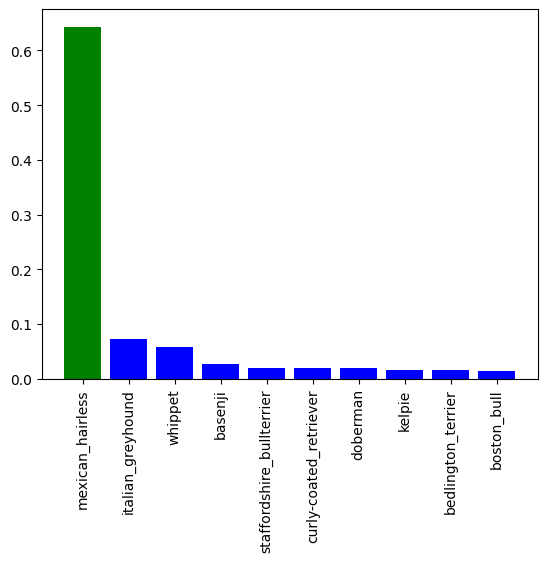

In [ ]:
plot_pred_conf(predictions, val_labels, n=60)

**Train the Model (full data)**

In [ ]:
full_data = create_data_batches(X, y)
full_data

Creating training data batches...


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
full_model = create_model()

Building with: https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5


In [ ]:
from tf_keras.callbacks import EarlyStopping, TensorBoard
full_model_tensorboard = TensorBoard(log_dir="/content/drive/MyDrive/Dog Breed Identificattion/logs/full_model_run")
full_model_early_stopping = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

In [57]:
full_model.fit(full_data, epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard])

Epoch 1/100
135/135 [==============================] - 144s 1s/step - loss: 2.0651 - accuracy: 0.5355
Epoch 2/100
135/135 [==============================] - 138s 1s/step - loss: 0.5361 - accuracy: 0.8774
Epoch 3/100
135/135 [==============================] - 140s 1s/step - loss: 0.3108 - accuracy: 0.9405
Epoch 4/100
135/135 [==============================] - 137s 1s/step - loss: 0.2003 - accuracy: 0.9710
Epoch 5/100
135/135 [==============================] - 138s 1s/step - loss: 0.1395 - accuracy: 0.9861
Epoch 6/100
135/135 [==============================] - 139s 1s/step - loss: 0.1041 - accuracy: 0.9937
Epoch 7/100
135/135 [==============================] - 140s 1s/step - loss: 0.0781 - accuracy: 0.9958
Epoch 8/100
135/135 [==============================] - 138s 1s/step - loss: 0.0624 - accuracy: 0.9986
Epoch 9/100
135/135 [==============================] - 138s 1s/step - loss: 0.0506 - accuracy: 0.9993
Epoch 10/100
135/135 [==============================] - 138s 1s/step - loss: 0.042

KeyboardInterrupt: 

**Make Predictions (test dataset)**

In [58]:
# Load test image file names
test_path = "dog-breed-identification/test"
test_filenames = [test_path + "/" + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['dog-breed-identification/test/1672018bbbc549cc43a14d9129197f08.jpg',
 'dog-breed-identification/test/0aa1ef16c5738686429329816f3eba76.jpg',
 'dog-breed-identification/test/02094b19b383b85741353fc00c085895.jpg',
 'dog-breed-identification/test/161141d06b50fd30b2cf61b2735fb105.jpg',
 'dog-breed-identification/test/11754ee6d33fceb7a8dab2c33f3ba008.jpg',
 'dog-breed-identification/test/06d0f5ea2a6042fa1dec8b734148edd0.jpg',
 'dog-breed-identification/test/07e4edc428816ffe6b8dd1024bed2782.jpg',
 'dog-breed-identification/test/0d74c3102be15724083f197376478395.jpg',
 'dog-breed-identification/test/035cd6cf8f1719fb7e29279610bbe9a3.jpg',
 'dog-breed-identification/test/161b2a67618d2217940282d01d27c32a.jpg']

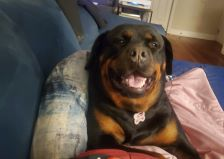

In [59]:
from IPython.display import Image

#my dogs
#Wisdom is a Rottweiler; Chance is a Jack Russel Terrier; Old Man was a Yorkshire Terrier
wisdom = '/content/Wisdom2.jpg'
chance = '/content/chance.jpg'
old_man = '/content/oldmanball.jpg'

my_dogs_test = [wisdom, chance, old_man]
Image(wisdom)

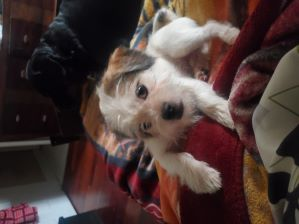

In [ ]:
Image(chance)

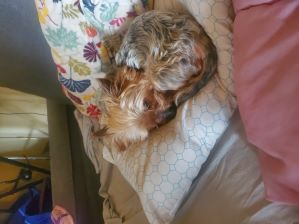

In [ ]:
Image(old_man )

In [61]:
my_dogs_test_data = create_data_batches(my_dogs_test, test_data=True)

Creating test data batches...


In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [62]:
my_dogs_test_predictions = model.predict(my_dogs_test_data, verbose=1)

1/1 [==============================] - 2s 2s/step


In [63]:
# Create pandas dataframe
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [64]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,1672018bbbc549cc43a14d9129197f08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0aa1ef16c5738686429329816f3eba76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02094b19b383b85741353fc00c085895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161141d06b50fd30b2cf61b2735fb105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11754ee6d33fceb7a8dab2c33f3ba008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
import os

# The error "ValueError: Length of values (3) does not match length of index (986)"
# occurs because `preds_df` was initialized with `test_ids` (986 entries)
# in the previous cells, making it a DataFrame with 986 rows.
# However, `my_dogs_test_predictions` contains predictions for only 3 images.
# You are trying to assign a 3-row array to columns of a 986-row DataFrame,
# which causes the length mismatch.

# To fix this, we should create a new DataFrame specifically for 'my_dogs_test_predictions'.
# First, extract the IDs (filenames without path and extension) for 'my_dogs_test'.
my_dogs_ids = [os.path.basename(path).split('.')[0] for path in my_dogs_test]

# Create a new DataFrame for these specific predictions
my_dogs_predictions_df = pd.DataFrame(columns=["id"] + list(unique_breeds_filtered))
my_dogs_predictions_df["id"] = my_dogs_ids
my_dogs_predictions_df[list(unique_breeds_filtered)] = my_dogs_test_predictions

# Display the head of the new DataFrame
my_dogs_predictions_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,Wisdom2,0.001190,0.000095,0.000059,0.000235,0.000077,0.001228,0.000097,0.000231,0.000023,...,0.000096,0.000224,0.000039,0.000008,0.000006,0.000001,0.000013,0.000061,0.000010,0.000118
1,chance,0.008663,0.000048,0.000027,0.000859,0.000265,0.000511,0.004854,0.000942,0.000160,...,0.004001,0.001664,0.000010,0.000246,0.000055,0.000274,0.132766,0.001590,0.004926,0.005640
2,oldmanball,0.008869,0.001496,0.000009,0.020808,0.000056,0.000024,0.109859,0.000283,0.000161,...,0.002095,0.000916,0.000207,0.000402,0.000438,0.002698,0.000189,0.000713,0.004873,0.175280


from matplotlib import pyplot as plt
_df_42['affenpinscher'].plot(kind='hist', bins=20, title='affenpinscher')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43['afghan_hound'].plot(kind='hist', bins=20, title='afghan_hound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44['african_hunting_dog'].plot(kind='hist', bins=20, title='african_hunting_dog')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45['airedale'].plot(kind='hist', bins=20, title='airedale')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_46.groupby('id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47.plot(kind='scatter', x='affenpinscher', y='afghan_hound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='afghan_hound', y='african_hunting_dog', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='african_hunting_dog', y='airedale', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50.plot(kind='scatter', x='airedale', y='american_staffordshire_terrier', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['affenpinscher']
  ys = series['afghan_hound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_51.sort_values('affenpinscher', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('affenpinscher')
_ = plt.ylabel('afghan_hound')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['affenpinscher']
  ys = series['african_hunting_dog']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_52.sort_values('affenpinscher', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('affenpinscher')
_ = plt.ylabel('african_hunting_dog')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['affenpinscher']
  ys = series['american_staffordshire_terrier']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_53.sort_values('affenpinscher', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('affenpinscher')
_ = plt.ylabel('american_staffordshire_terrier')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['affenpinscher']
  ys = series['appenzeller']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_54.sort_values('affenpinscher', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('affenpinscher')
_ = plt.ylabel('appenzeller')

from matplotlib import pyplot as plt
_df_55['affenpinscher'].plot(kind='line', figsize=(8, 4), title='affenpinscher')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_56['afghan_hound'].plot(kind='line', figsize=(8, 4), title='afghan_hound')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_57['african_hunting_dog'].plot(kind='line', figsize=(8, 4), title='african_hunting_dog')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_58['airedale'].plot(kind='line', figsize=(8, 4), title='airedale')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_59['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_59, x='affenpinscher', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_60['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_60, x='afghan_hound', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_61['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_61, x='african_hunting_dog', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_62['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_62, x='airedale', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [81]:
# To get the breed with the highest prediction probability for 'Wisdom2' (which is at index 0),
# you should select the row and then find the column with the maximum value.
wisdom_predicted_breed = my_dogs_predictions_df[list(unique_breeds_filtered)].iloc[0].idxmax()
chance_predicted_breed = my_dogs_predictions_df[list(unique_breeds_filtered)].iloc[1].idxmax()
old_man_predicted_breed = my_dogs_predictions_df[list(unique_breeds_filtered)].iloc[2].idxmax()
print(f"Wisdom's predicted breed is: {wisdom_predicted_breed}")
print(f"Chance's predicted breed is: {chance_predicted_breed}")
print(f"Old Man's predicted breed is: {old_man_predicted_breed}")

Wisdom's predicted breed is: rottweiler
Chance's predicted breed is: maltese_dog
Old Man's predicted breed is: norfolk_terrier
